In [1]:
import os
cwd=os.getcwd()
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn
seaborn.set(style='ticks')

In [3]:
df=pd.read_csv('Comcast.csv')

In [4]:
df.head()

,Ticket #,Customer Complaint,Date,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-2015,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,4/8/2015,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-2015,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,5/7/2015,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-2015,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


In [5]:
df.isnull().sum().sum()

0

In [6]:
df['DateIndex']= df['Date']+" "+df["Time"]

In [7]:
df["DateIndex"] = pd.to_datetime(df["DateIndex"])
df["Date"] = pd.to_datetime(df["Date"])
df.head()

,Ticket #,Customer Complaint,Date,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,DateIndex
0,250635,Comcast Cable Internet Speeds,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,2015-04-22 15:53:50
1,223441,Payment disappear - service got disconnected,2015-04-08,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,2015-04-08 10:22:56
2,242732,Speed and Service,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,2015-04-18 09:55:47
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,2015-05-07,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,2015-05-07 11:59:35
4,307175,Comcast not working and no service to boot,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,2015-05-26 13:25:26


In [8]:
df = df.set_index(df["DateIndex"])
df.head()

,Ticket #,Customer Complaint,Date,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,DateIndex
DateIndex,,,,,,,,,,,
2015-04-22 15:53:50,250635,Comcast Cable Internet Speeds,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,2015-04-22 15:53:50
2015-04-08 10:22:56,223441,Payment disappear - service got disconnected,2015-04-08,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,2015-04-08 10:22:56
2015-04-18 09:55:47,242732,Speed and Service,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,2015-04-18 09:55:47
2015-05-07 11:59:35,277946,Comcast Imposed a New Usage Cap of 300GB that ...,2015-05-07,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,2015-05-07 11:59:35
2015-05-26 13:25:26,307175,Comcast not working and no service to boot,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,2015-05-26 13:25:26


In [9]:
df['Date'].value_counts()

2015-06-24    218
2015-06-23    190
2015-06-25     98
2015-06-26     55
2015-06-30     53
             ... 
2015-05-24      7
2015-05-02      7
2015-04-05      6
2015-04-11      5
2015-05-03      5
Name: Date, Length: 91, dtype: int64

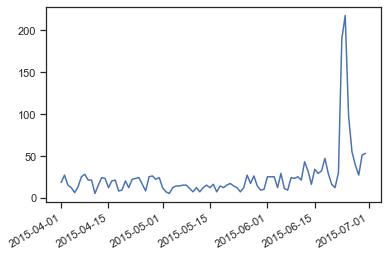

In [10]:
df['Date'].value_counts().plot();

#### Maximum no. of complaints in the month of 'JUNE'.

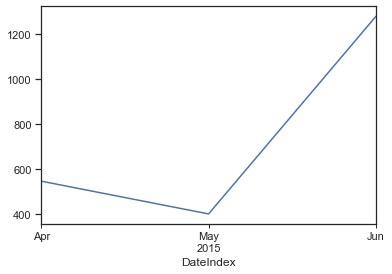

In [12]:
f = df.groupby(pd.Grouper(freq="M")).size().plot()

In [13]:
df['Status'].unique()

array(['Closed', 'Open', 'Solved', 'Pending'], dtype=object)

In [14]:
df["NewStatus"] = ["Open" if Status=="Open" or Status=="Pending" else "Closed" for Status in df["Status"]]

In [15]:
df.head(3)

,Ticket #,Customer Complaint,Date,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,DateIndex,NewStatus
DateIndex,,,,,,,,,,,,
2015-04-22 15:53:50,250635,Comcast Cable Internet Speeds,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,2015-04-22 15:53:50,Closed
2015-04-08 10:22:56,223441,Payment disappear - service got disconnected,2015-04-08,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,2015-04-08 10:22:56,Closed
2015-04-18 09:55:47,242732,Speed and Service,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,2015-04-18 09:55:47,Closed


In [16]:
df.groupby(["State"]).size().sort_values(ascending=False).to_frame().reset_index().rename({0: "Count"},axis=1)[:5]

,State,Count
0,Georgia,288
1,Florida,240
2,California,220
3,Illinois,164
4,Tennessee,143


In [17]:
Status_complaints = df.groupby(["State","NewStatus"]).size().unstack()
Status_complaints

NewStatus,Closed,Open
State,,
Alabama,17.0,9.0
Arizona,14.0,6.0
Arkansas,6.0,NaN
California,159.0,61.0
Colorado,58.0,22.0
Connecticut,9.0,3.0
Delaware,8.0,4.0
District Of Columbia,14.0,2.0
District of Columbia,1.0,NaN


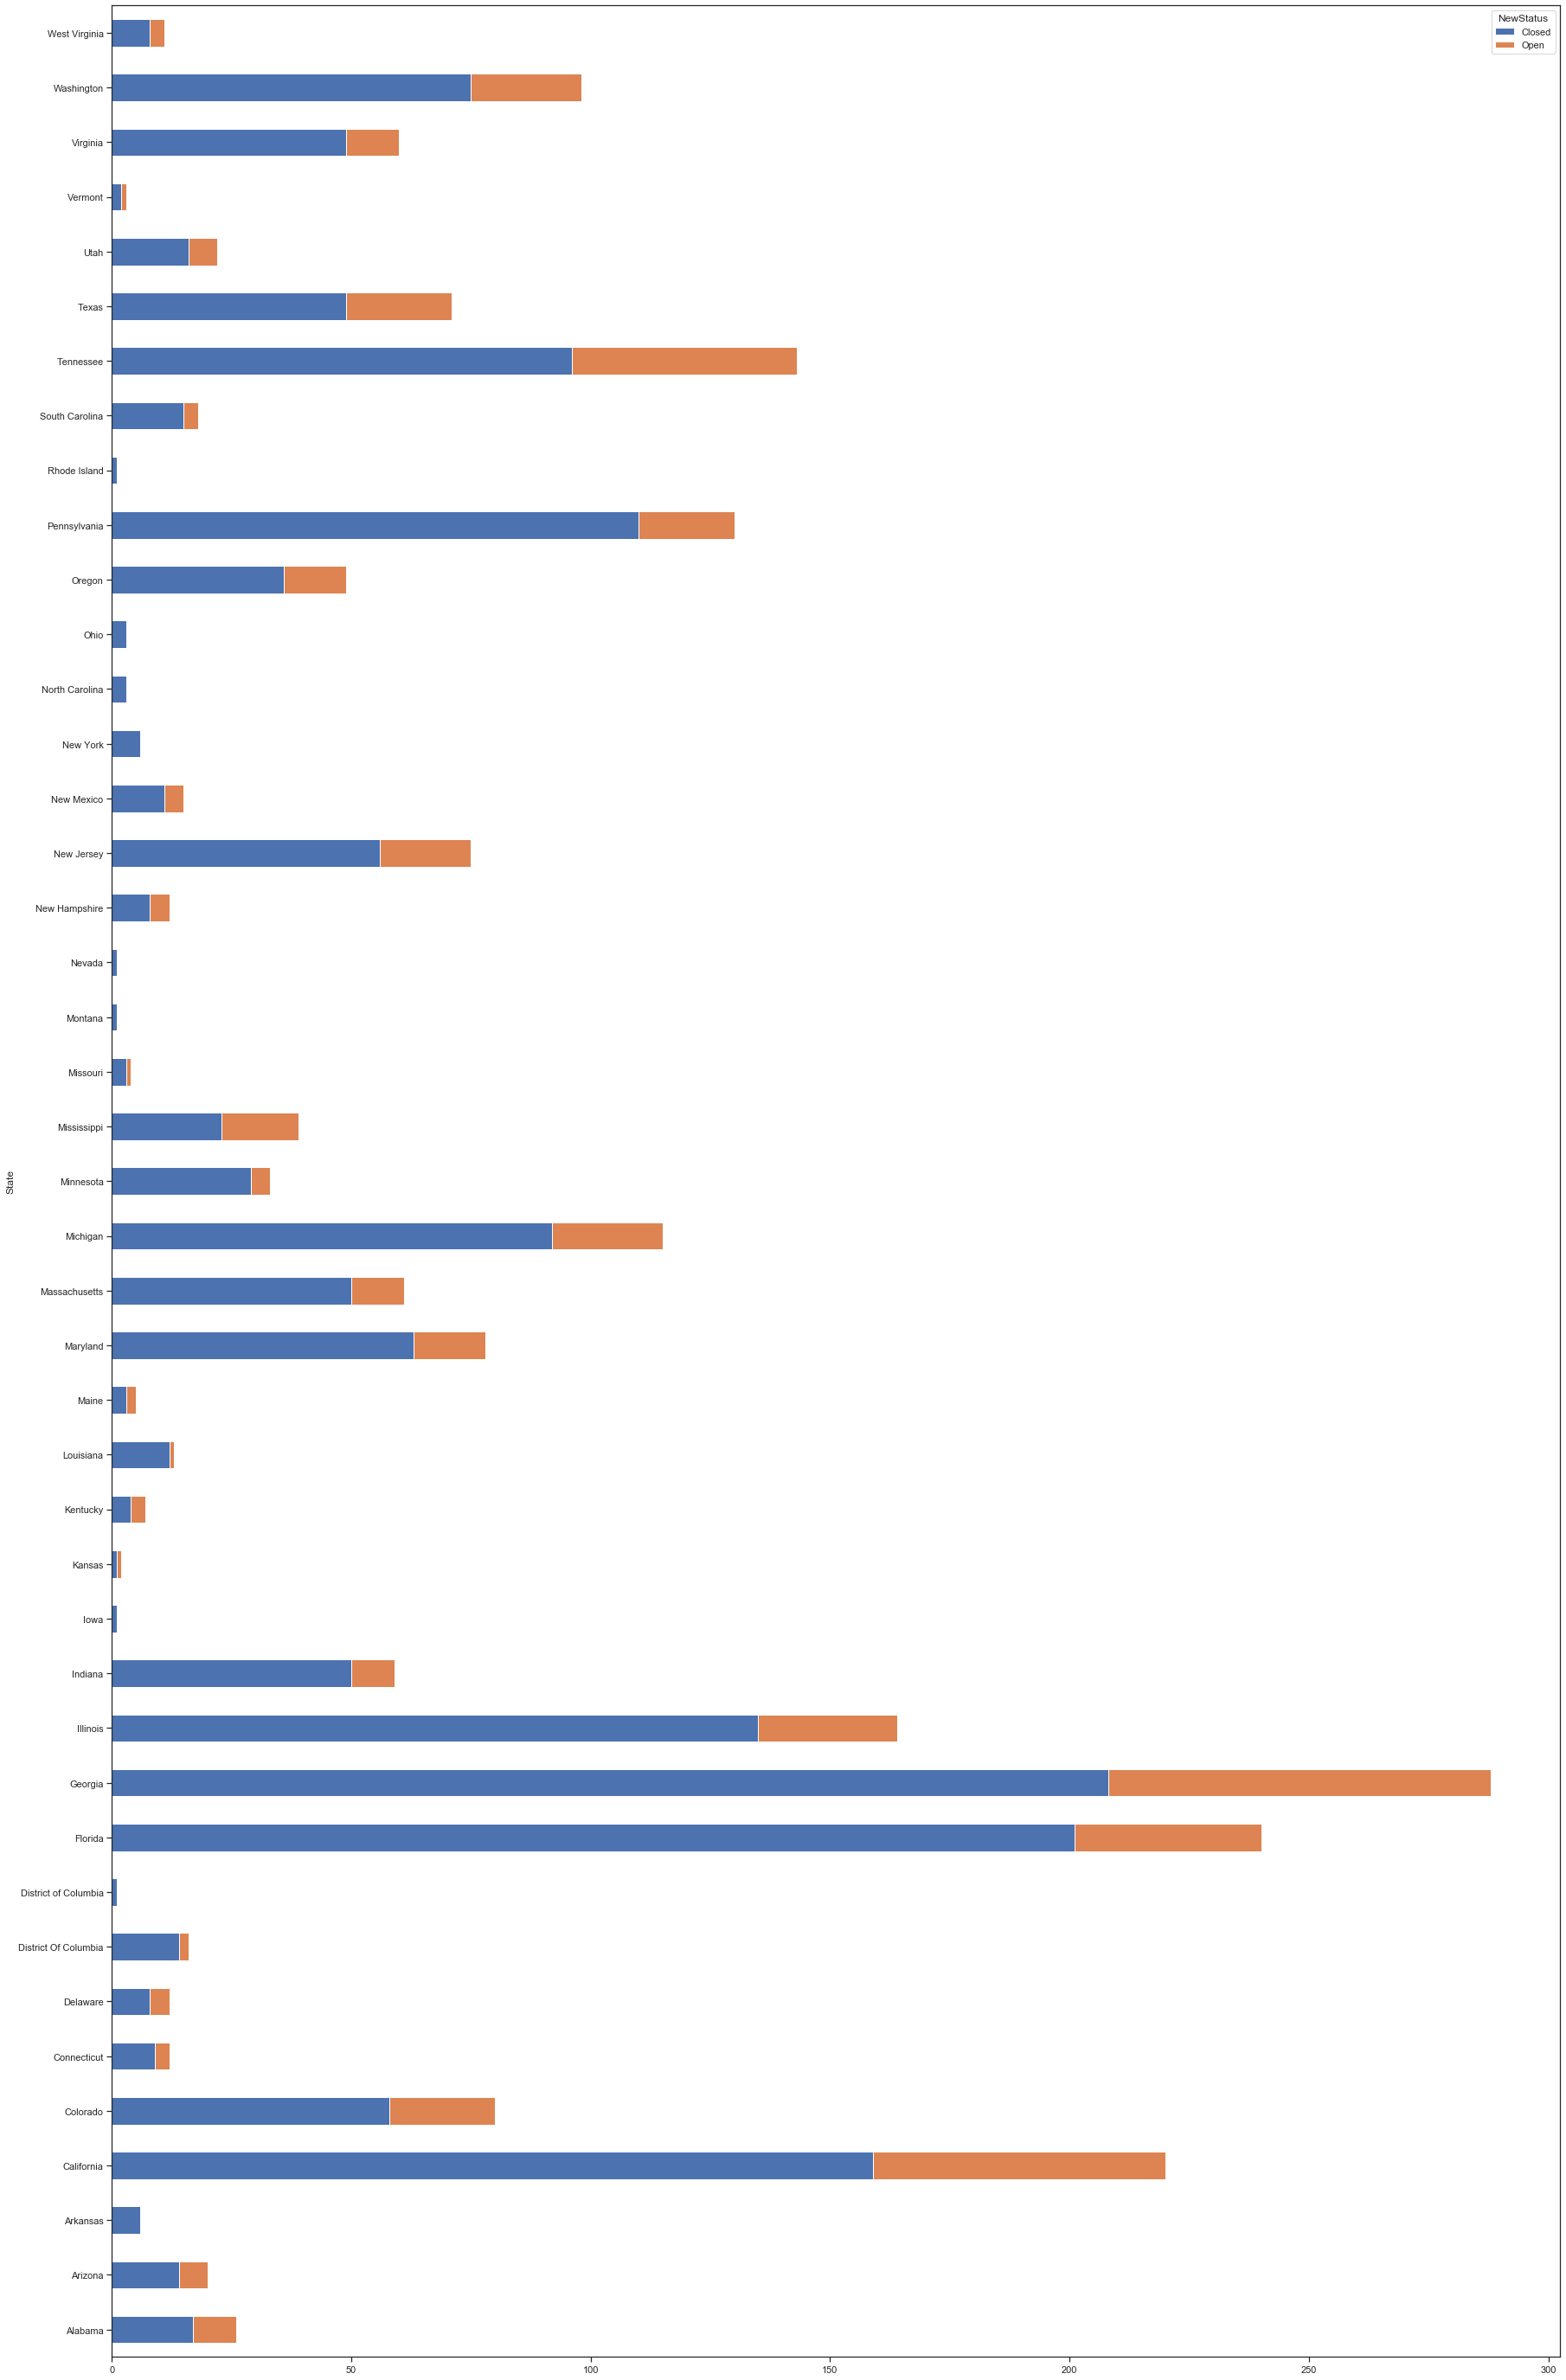

In [18]:
Status_complaints.plot(kind="barh", figsize=(30,50), stacked=True)

In [25]:
#pip install wordcloud

In [23]:
import matplotlib.pyplot as pPlot
from wordcloud import STOPWORDS,WordCloud

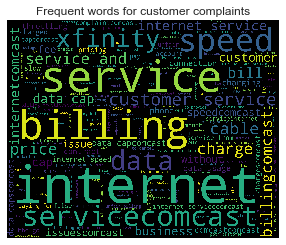

In [26]:
common_complaints = df['Customer Complaint'].dropna().tolist()
common_complaints =''.join(common_complaints).lower()

list_stops = ('comcast','now','company','day','someone','thing','also','got','way','call','called','one','said','tell')

for word in list_stops:
    STOPWORDS.add(word)
wordcloud = WordCloud(stopwords=STOPWORDS,background_color='black',width=5000,height=4000).generate(common_complaints)
plt.imshow(wordcloud)
plt.title('Frequent words for customer complaints')
plt.axis('off')
plt.show()

It can be seen that most of the customer complaints revolve arounr Billing, Speed, Internet.